<a href="https://colab.research.google.com/github/ankit-rathi/Data-Science-with-Python/blob/master/Nifty100_All_in_One_Indicators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-ta
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=3c12b3224993f81eeef8edd1afffafae81dbdbc1c31ac96f59827c7b019252d9
  Stored in directory: /root/.cache/pip/wheels/54/4a/75/06b8e63fce6f6d2c1baae5c208edb18eca128407b0c96e1153
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 110 kB 35.0 MB/s 
     |████████████████████████████████| 128 kB 62.7 MB/s 
     |████████████████████████████████| 4.0 MB 57.1 MB/s 
     |████████████████████████████████| 112 kB 49.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling reques

In [2]:
import yfinance as yfin
yfin.pdr_override()
import pandas as pd
import pandas_ta as ta

import numpy as np
import plotly.graph_objs as go
import plotly
import plotly.subplots

def get_all_in_one_indicators(stock):
  df = yfin.Ticker(stock).history(period='2y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # calculate MACD values
  df['200_ema'] = round(df['close'].ewm(span = 200, adjust = False).mean(),0) 
  df['50_ema'] = round(df['close'].ewm(span = 50, adjust = False).mean(),0) 
  df.ta.macd(close='close', fast=36, slow=78, signal=27, append=True)
  df.ta.eom(append=True)
  df.ta.rsi(append=True)

  df = df[df.index >= '2022-01-01']
  # Force lowercase (optional)
  df.columns = [x.lower() for x in df.columns]
  # Construct a 2 x 1 Plotly figure
  fig = plotly.subplots.make_subplots(rows=4, cols=1)
  # price Line
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['close'],
          line=dict(color='#0000ff', width=1),
          name='price',
          # showlegend=False,
          # legendgroup='1',
      ), row=1, col=1
  )
  # EMA 200
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['200_ema'],
          line=dict(color='#000000', width=2),
          name='200 ema',
          # showlegend=False,
          # legendgroup='2',
      ), row=1, col=1
  )
  # EMA 50
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['50_ema'],
          line=dict(color='#ff9900', width=2),
          name='50 ema',
          # showlegend=False,
          # legendgroup='2',
      ), row=1, col=1
  )
  # Fast Signal (%k)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macd_36_78_27'],
          line=dict(color='#ff9900', width=2),
          name='macd',
          # showlegend=False,
          # legendgroup='2',
      ), row=2, col=1
  )
  # Slow signal (%d)
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['macds_36_78_27'],
          line=dict(color='#000000', width=2),
          # showlegend=False,
          # legendgroup='2',
          name='signal'
      ), row=2, col=1
  )
  # Colorize the histogram values
  colors = np.where(df['macdh_36_78_27'] < 0, '#000', '#ff9900')
  # Plot the histogram
  fig.append_trace(
      go.Bar(
          x=df.index,
          y=df['macdh_36_78_27'],
          name='histogram',
          marker_color=colors,
      ), row=2, col=1
  )
  # RSI
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['rsi_14'],
          line=dict(color='#00ff00', width=2),
          name='rsi',
          # showlegend=False,
          legendgroup='2',
      ), row=3, col=1
  )
  # EOM
  fig.append_trace(
      go.Scatter(
          x=df.index,
          y=df['eom_14_100000000'],
          line=dict(color='#ff0000', width=2),
          name='eom',
          # showlegend=False,
          legendgroup='2',
      ), row=4, col=1
  )
  # Make it pretty
  layout = go.Layout(
      plot_bgcolor='#efefef',
      # Font Families
      font_family='Monospace',
      font_color='#000000',
      font_size=12,
      width=1500, 
      height=1200,
      xaxis=dict(
          rangeslider=dict(
              visible=False
          )
      )
  )
  # Update options and show plot
  fig.update_layout(layout)
  fig.show()

stock = 'TATAMOTORS.NS'
get_all_in_one_indicators(stock)

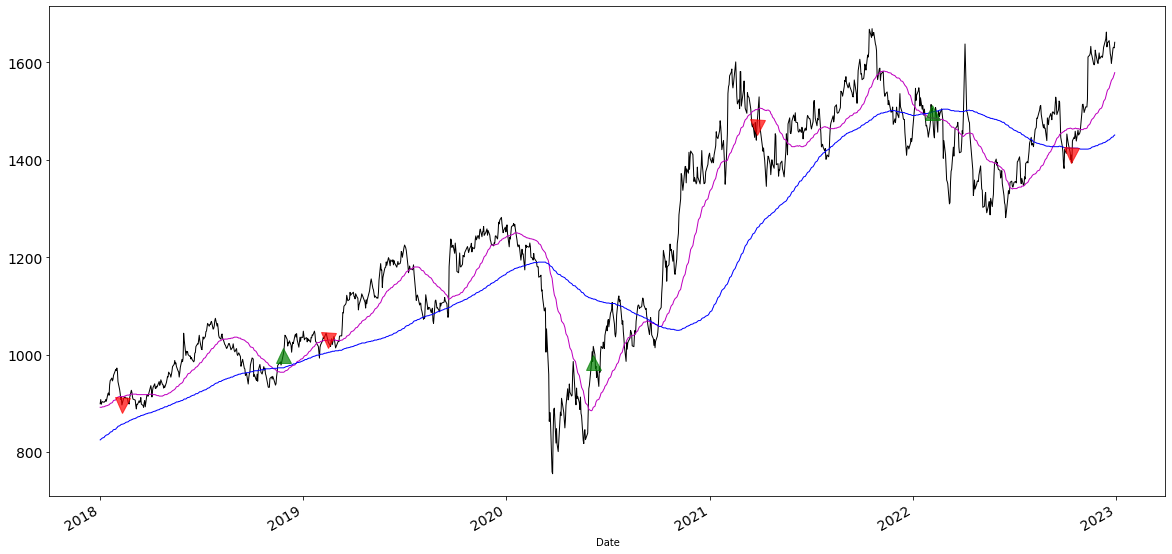

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def get_buy_sell_recomm(stock):

  df = yfin.Ticker(stock).history(period='6y')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
  # Force lowercase (optional)
  # df.columns = [x.lower() for x in df.columns]
  # calculate MACD values
  df['200_SMA'] = round(df['Close'].rolling(window = 200, min_periods = 1).mean(),0) 
  df['50_SMA'] = round(df['Close'].rolling(window = 50, min_periods = 1).mean(),0) 
  #df.ta.macd(close='close', fast=36, slow=78, signal=27, append=True)
  df.ta.eom(append=True)
  df.ta.rsi(append=True)
  df['Dev%_200'] = round((df['Close'] - df['200_SMA'])*100/df['200_SMA'],2)
  df['200_SMA_Lag10'] = df['200_SMA'].shift(10)
  df['Slope%_200'] = round((df['200_SMA'] - df['200_SMA_Lag10'])*100/df['200_SMA'],2)
  df['50_SMA_Lag5'] = df['50_SMA'].shift(5)
  df['Slope%_50'] = round((df['50_SMA'] - df['50_SMA_Lag5'])*100/df['50_SMA'],2)

  df['Signal'] = 'Hold'
  df.loc[ (abs(df['Slope%_50']) <= .2) & (df['200_SMA'] < df['50_SMA']) & (df['Close'] < df['50_SMA']) , 'Signal'] = 'Sell'
  df.loc[ (abs(df['Slope%_50']) <= .2) & (df['200_SMA'] > df['50_SMA']) & (df['Close'] > df['50_SMA']), 'Signal'] = 'Buy'


  df.drop(['Open', 'Low', 'High', 'Volume','200_SMA_Lag10','50_SMA_Lag5'], axis=1, inplace=True) 

  df = df[df.index >= '2018-01-01']

  # plot close price, short-term and long-term moving averages
  plt.figure(figsize = (20,10))
  plt.tick_params(axis = 'both', labelsize = 14)
  df['Close'].plot(color = 'k', lw = 1, label = 'Close')  
  df['50_SMA'].plot(color = 'm', lw = 1, label = '50_SMA')
  df['200_SMA'].plot(color = 'b', lw = 1, label = '200_SMA') 

  tmp = df[df['Signal'] != 'Hold']
  tmp['Prev_Signal'] = tmp['Signal'].shift(1)
  tmp['Recomm'] = tmp['Signal']
  tmp.loc[ (tmp['Signal'] == tmp['Prev_Signal']) , 'Recomm'] = 'Hold'
  tmp = tmp[tmp['Recomm'] != 'Hold']

  # plot 'buy' signals
  plt.plot(tmp[tmp['Recomm'] == 'Buy'].index, 
          tmp[tmp['Recomm'] == 'Buy']['Close'], 
          '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

  # plot 'sell' signals
  plt.plot(tmp[tmp['Recomm'] == 'Sell'].index, 
          tmp[tmp['Recomm'] == 'Sell']['Close'], 
          'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
  #return tmp
  
stock = 'HDFCBANK.NS'
get_buy_sell_recomm(stock)

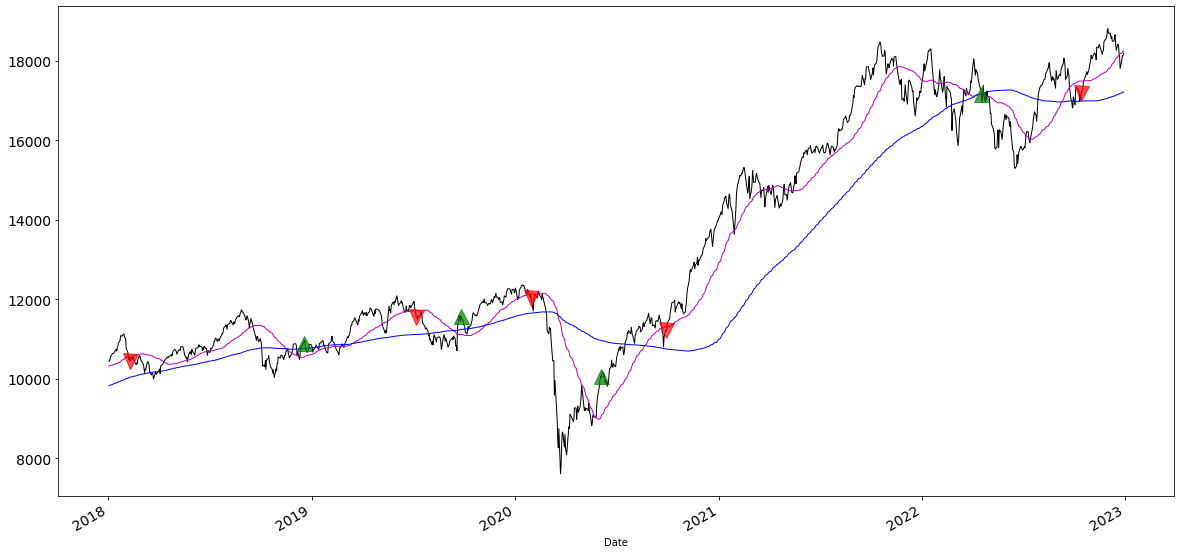

In [4]:
stock = '^NSEI'
get_buy_sell_recomm(stock)